## 데이터 선정 배경 및 진행 방법
사람의 특성에는 많은 것들이 있습니다. 키와 몸무게도 그 중 하나가 될 수 있는데 남성이 여성보다 평균적으로 10cm가량 크고, 몸무게도 많이 나가는 것이 보통입니다. 이에 착안하여 키와 몸무게 데이터로 성별을 얼마나 정확히 predict할 수 있는지 ML기법을 이용하여 진행하였습니다.
아직 기초적인 수준으로 inflearn강의에서 진행한 기법을 중심으로 review 해보았습니다.

### 예상 결과
모든 사람의 체중이 정상범위 값일 경우 p > 0.5, 체중이 균일분포 혹은 특정 분포를 따를 경우 p = 0.5라고 예상하였습니다. 

### Data dictionary
* Gender : Male / Female

* Height : Number (cm)

* Weight : Number (Kg)

* Index :

        0 - Extremely Weak

        1 - Weak

        2 - Normal

        3 - Overweight

        4 - Obesity

        5 - Extreme Obesity

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [2]:
dt_clf = DecisionTreeClassifier()
body_df = pd.read_csv('C:\\Users\\flowe\\OneDrive - San Francisco State University\\Project_Expert_GitHub\\Project_Python\\JupyterNotebookWorkingSpace\\PerfectGuid\\2장\\500_Person_Gender_Height_Weight_Index.csv')

In [3]:
body_df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [4]:
# 남자는 1, 여자는 2로 replace
body_df['Gender'].replace('Male', 1, inplace=True)
body_df['Gender'].replace('Female', 2, inplace=True)

# target을 성별로 설정
body_target = body_df['Gender']
body_target

0      1
1      1
2      2
3      2
4      1
      ..
495    2
496    2
497    2
498    1
499    1
Name: Gender, Length: 500, dtype: int64

In [5]:
# data로 키와 몸무게를 받아옴
body_data = body_df[["Height", "Weight"]]
body_data

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
...,...,...
495,150,153
496,184,121
497,141,136
498,150,95


** 전체 남녀의 키와 몸무게에 대한 데이터 개요 **

In [6]:
M = body_df[body_df["Gender"] == 1].count()[0]
F = body_df[body_df["Gender"] == 2].count()[0]
print("남자 {0}명, 여자 {1}명의 데이터".format(M, F))

남자 245명, 여자 255명의 데이터


In [7]:
M_m_h = body_df[body_df["Gender"] == 1]["Height"].mean()
M_sd_h = body_df[body_df["Gender"] == 1]["Height"].std()
print("전체 남자 키 평균 : {0:.2f}, 전체 남자 키 표준편차 : {1:.2f}".format(M_m_h, M_sd_h))
M_m_w = body_df[body_df["Gender"] == 1]["Weight"].mean()
M_sd_w = body_df[body_df["Gender"] == 1]["Weight"].std()
print("전체 남자 체중 평균 : {0:.2f}, 전체 남자 체중 표준편차 : {1:.2f}".format(M_m_w, M_sd_w))

전체 남자 키 평균 : 169.65, 전체 남자 키 표준편차 : 17.07
전체 남자 체중 평균 : 106.31, 전체 남자 체중 표준편차 : 31.83


In [8]:
F_m_h = body_df[body_df["Gender"] == 2]["Height"].mean()
F_sd_h = body_df[body_df["Gender"] == 2]["Height"].std()
print("전체 여자 키 평균 : {0:.2f}, 전체 키 표준편차 : {1:.2f}".format(F_m_h, F_sd_h))
F_m_w = body_df[body_df["Gender"] == 2]["Weight"].mean()
F_sd_w = body_df[body_df["Gender"] == 2]["Weight"].std()
print("전체 체중 평균 : {0:.2f}, 전체 체중 표준편차 : {1:.2f}".format(F_m_w, F_sd_w))

전체 여자 키 평균 : 170.23, 전체 키 표준편차 : 15.71
전체 체중 평균 : 105.70, 전체 체중 표준편차 : 32.96


<AxesSubplot:xlabel='Height'>

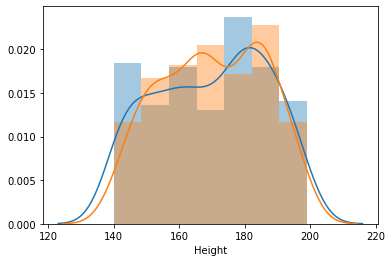

In [9]:
import seaborn as sns
# 전체 남녀 키의 분포도 비교
sns.distplot(body_df[body_df["Gender"] == 1]["Height"])
sns.distplot(body_df[body_df["Gender"] == 2]["Height"])

<AxesSubplot:xlabel='Weight'>

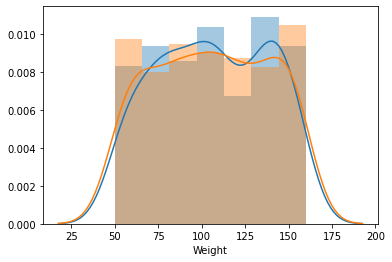

In [10]:
# 전체 남녀 체중의 분포도 비교
sns.distplot(body_df[body_df["Gender"] == 1]["Weight"])
sns.distplot(body_df[body_df["Gender"] == 2]["Weight"])

* train set과 test set을 나누어 적합

In [11]:
X_train, X_test, y_train, y_test = train_test_split(body_data, body_target, test_size=0.2, random_state=11)

In [12]:
# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행 
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [13]:
# X_test로 의사결정트리 진행하여 pred의 그 결과 값 저장
pred = dt_clf.predict(X_test)

In [14]:
print(len(X_test))
print(X_test)

100
     Height  Weight
247     142     159
239     146     110
70      153      51
136     190     156
387     160      83
..      ...     ...
230     186     137
487     187      80
153     168     140
290     156      74
21      153     149

[100 rows x 2 columns]


In [15]:
pred

array([2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1,
       2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2], dtype=int64)

In [16]:
# 예상과 비슷하게 0.5 정도의 예측 정확도를 나타냄
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.4800


* k fold 검정 실시

In [17]:
# kfold 검정
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

features = body_data.to_numpy()
label = body_target.to_numpy()
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('바디 데이터 세트 크기:',features.shape[0])

바디 데이터 세트 크기: 500


In [18]:
X_train, X_test = features[train_index], features[test_index]
y_train, y_test = label[train_index], label[test_index]
# pd.DataFrame(kfold.split(features))[0]

NameError: name 'train_index' is not defined

In [19]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :0.47, 학습 데이터 크기: 400, 검증 데이터 크기: 100
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]

#2 교차 검증 정확도 :0.49, 학습 데이터 크기: 400, 검증 데이터 크기: 100
#2 검증 세트 인덱스:[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199]

#3 교차 검증 정확도 :0.45, 학습 데이터 크기: 400, 검증 데이터 크기: 100
#3 검증 세트 인덱스:[200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 22

* stratified K 검정

In [20]:
import pandas as pd

body_df = pd.DataFrame(data=body_data, columns=list(body_df))
print(body_df)
body_df['label']=body_target
body_df['label'].value_counts()

Gender  Height  Weight  Index
0       NaN     174      96    NaN
1       NaN     189      87    NaN
2       NaN     185     110    NaN
3       NaN     195     104    NaN
4       NaN     149      61    NaN
..      ...     ...     ...    ...
495     NaN     150     153    NaN
496     NaN     184     121    NaN
497     NaN     141     136    NaN
498     NaN     150      95    NaN
499     NaN     173     131    NaN

[500 rows x 4 columns]


2    255
1    245
Name: label, dtype: int64

In [21]:
kfold = KFold(n_splits=3)
n_iter =0
for train_index, test_index  in kfold.split(body_df):
    n_iter += 1
    label_train= body_df['label'].iloc[train_index]
    label_test= body_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    print()
    

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    171
1    162
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    84
1    83
Name: label, dtype: int64

## 교차 검증: 2
학습 레이블 데이터 분포:
 2    176
1    157
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    88
2    79
Name: label, dtype: int64

## 교차 검증: 3
학습 레이블 데이터 분포:
 1    171
2    163
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    92
1    74
Name: label, dtype: int64



In [22]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(body_df, body_df['label']):
    n_iter += 1
    label_train= body_df['label'].iloc[train_index]
    label_test= body_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    print()

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    170
1    163
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    85
1    82
Name: label, dtype: int64

## 교차 검증: 2
학습 레이블 데이터 분포:
 2    170
1    163
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    85
1    82
Name: label, dtype: int64

## 교차 검증: 3
학습 레이블 데이터 분포:
 2    170
1    164
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    85
1    81
Name: label, dtype: int64



In [23]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(features, label):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :0.503, 학습 데이터 크기: 333, 검증 데이터 크기: 167
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 167]

#2 교차 검증 정확도 :0.4551, 학습 데이터 크기: 333, 검증 데이터 크기: 167
#2 검증 세트 인덱스:[166 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 2

* cross_val_score()

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris
import numpy as np

dt_clf = DecisionTreeClassifier(random_state=156)

data = body_data
label = body_target

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=5)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))


교차 검증별 정확도: [0.49 0.51 0.48 0.57 0.51]
평균 검증 정확도: 0.512


* GridSearchCV

In [25]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(body_data, body_target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2,3]}

In [26]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True, return_train_score=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과는 cv_results_ 라는 딕셔너리로 저장됨. 이를 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.522500,1,0.522388,0.533835,0.511278
1,"{'max_depth': 1, 'min_samples_split': 3}",0.522500,1,0.522388,0.533835,0.511278
2,"{'max_depth': 2, 'min_samples_split': 2}",0.482419,5,0.514925,0.488722,0.443609
3,"{'max_depth': 2, 'min_samples_split': 3}",0.482419,5,0.514925,0.488722,0.443609
4,"{'max_depth': 3, 'min_samples_split': 2}",0.497475,3,0.507463,0.511278,0.473684
5,"{'max_depth': 3, 'min_samples_split': 3}",0.497475,3,0.507463,0.511278,0.473684


In [27]:
grid_dtree.cv_results_

{'mean_fit_time': array([0.00365583, 0.00299184, 0.0029908 , 0.00265948, 0.00299128,
        0.00232267]),
 'std_fit_time': array([4.69291604e-04, 8.14490753e-04, 8.15366730e-04, 4.70639899e-04,
        4.49566384e-07, 4.63446756e-04]),
 'mean_score_time': array([0.00365734, 0.00199461, 0.00232855, 0.00233078, 0.00232792,
        0.00166233]),
 'std_score_time': array([4.72044743e-04, 1.21570099e-06, 4.70417935e-04, 1.24299715e-03,
        4.71033179e-04, 4.69740766e-04]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_sa

In [28]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

# refit=True로 설정된 GridSearchCV 객체가 fit()을 수행 시 학습이 완료된 Estimator를 내포하고 있으므로 predict()를 통해 예측도 가능. 
pred = grid_dtree.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.5225
테스트 데이터 세트 정확도: 0.4900


In [29]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.4900


### 결과

키와 체중만으로 성별을 맞출 확률은 0.5에 수렴함.

### 한계 및 개선점

1) 정상체중의 경우 데이터 수가 현저히 줄어들어 학습이 편중될 수 있음

2) 현대인의 체중은 생물학적 특성이 아니라 본인의 식습관에 영향을 받기에 남녀에 무관한 양상을 띔

3) 차후 데이터셋의 모든 변수가 y의 결정에 관여하는 데이터를 활용하여 재시도할 예정
